In [50]:
from google.colab import files
 
 
uploaded = files.upload()

Saving Country-data (1).csv to Country-data (1) (3).csv


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans

In [138]:
import pandas as pd
import io
 
data = pd.read_csv(io.BytesIO(uploaded['Country-data (1).csv']))
df=data.copy()
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


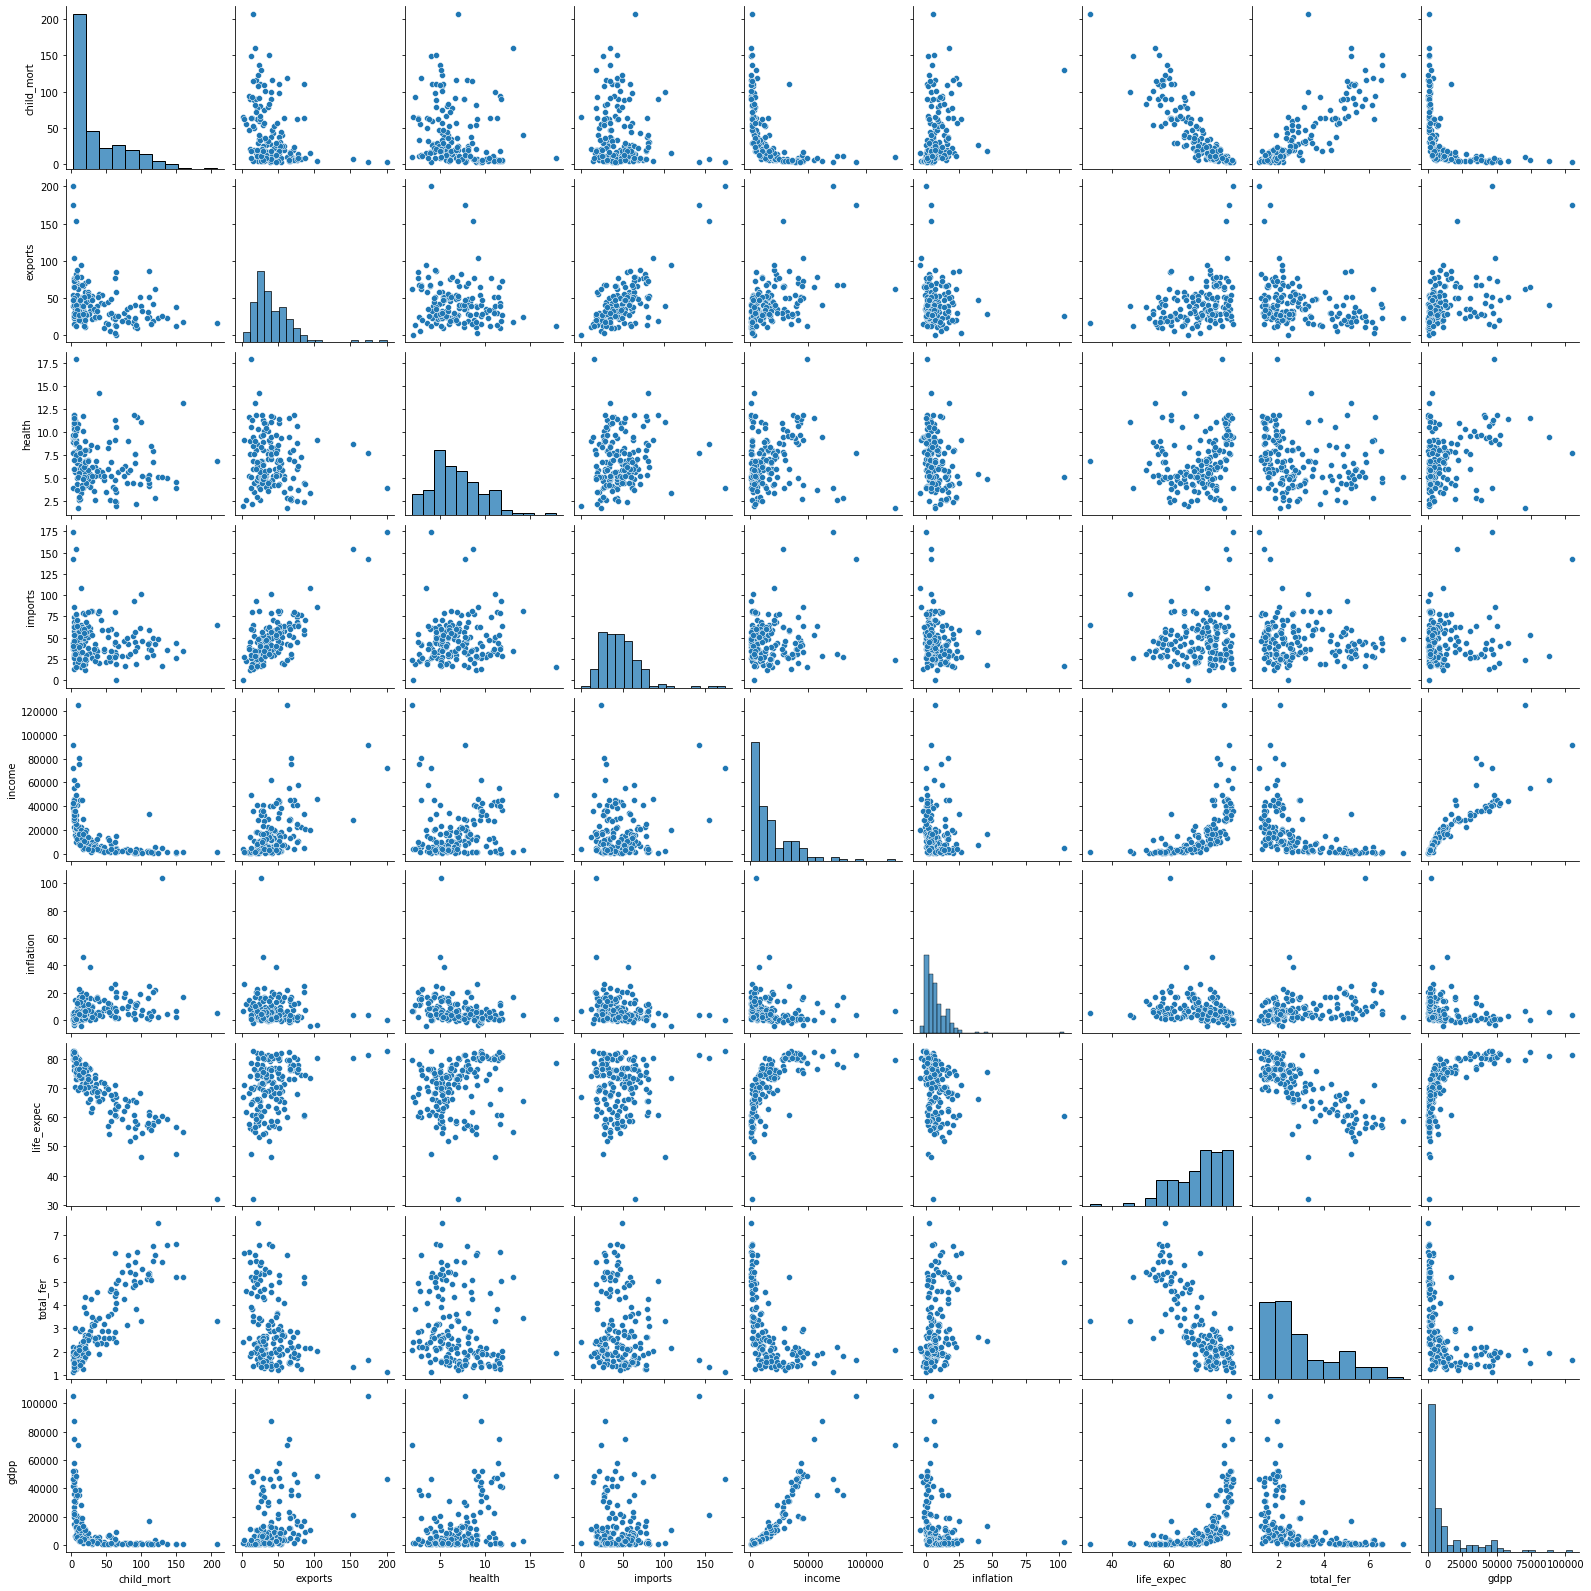

In [139]:
sns.pairplot(data)

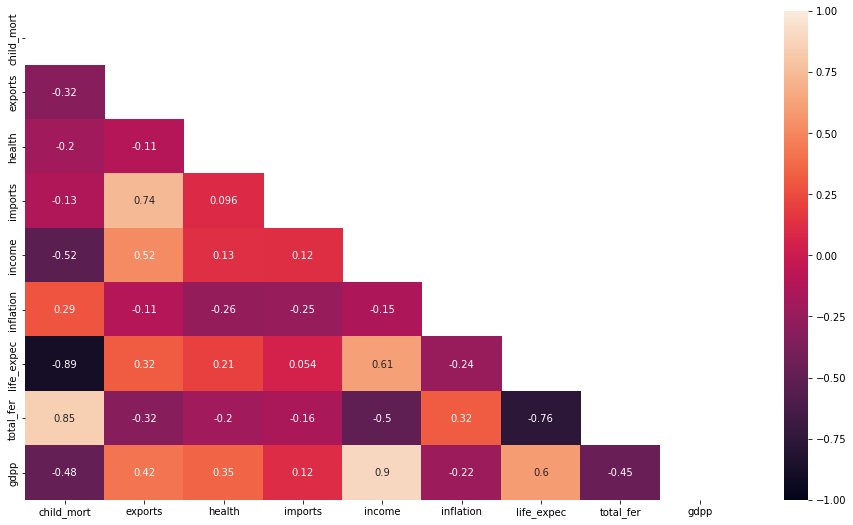

In [140]:
plt.figure(figsize=(16,9))
m=np.triu(np.ones_like(df.corr(),dtype=np.bool_))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,mask=m)

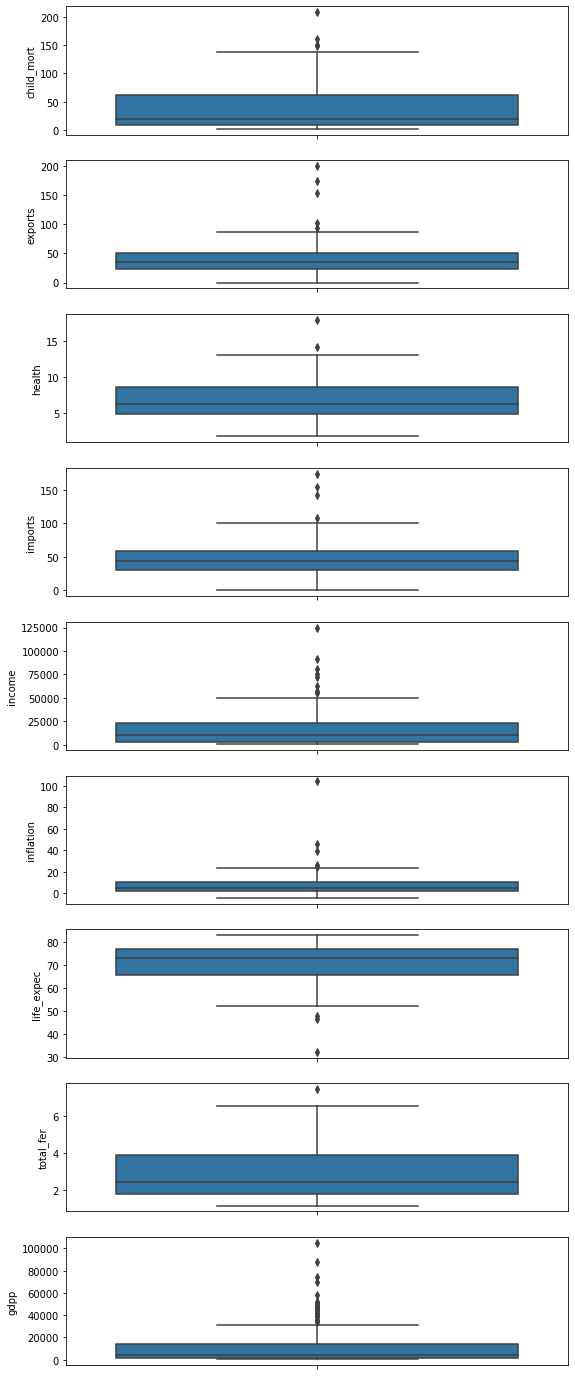

In [141]:
column_names =df.columns[1:]
fig,axes=plt.subplots(nrows=len(column_names),figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

In [142]:
column_names =df.columns[1:]
for col in df.columns[1:]:
    percentiles = df[col].quantile([0.05,0.95]).values
    df[col][df[col] <= percentiles[0]] = percentiles[0]
    df[col][df[col] >= percentiles[1]] = percentiles[1]

<ipython-input-142-00dfdb414d3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-142-00dfdb414d3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= percentiles[1]] = percentiles[1]
<ipython-input-142-00dfdb414d3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= percentiles[0]] = percentiles[0]
<ipython-input-142-00dfdb414d3d>:5: S

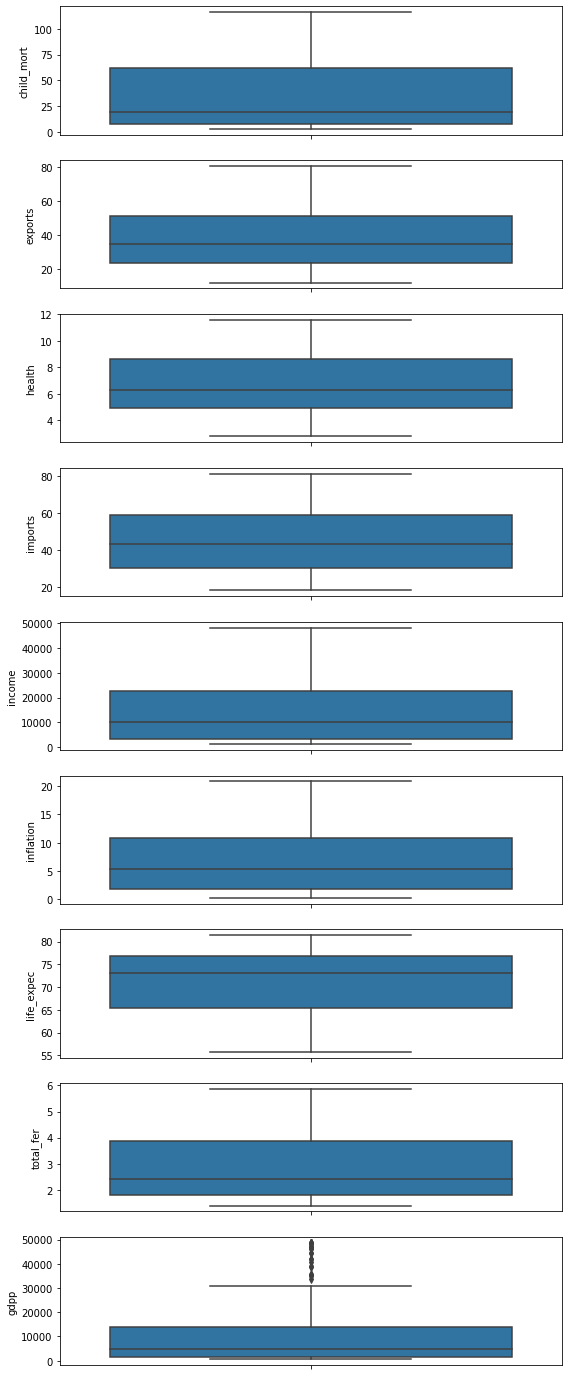

In [143]:
column_names =df.columns[1:]
fig,axes=plt.subplots(nrows=len(column_names),figsize=(9,25))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i],y=column_names[i],data=df)

In [144]:
df.set_index("country",inplace=True)

In [145]:
from sklearn.preprocessing import StandardScaler
column_names=df.columns
scaler=StandardScaler()
df=scaler.fit_transform(df)
df=pd.DataFrame(df,index=data.country, columns=column_names)

PCA

In [146]:
pca=PCA()
pca.fit(df)

PCA()

<BarContainer object of 9 artists>

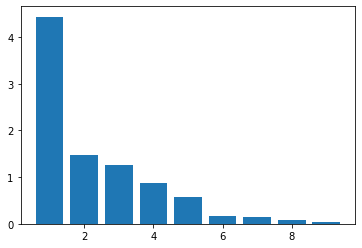

In [147]:
plt.bar(height=pca.explained_variance_,x=range(1,len(pca.explained_variance_)+1))

In [148]:

pca=PCA(n_components=5)
df_pca=pd.DataFrame(pca.fit_transform(df),index=df.index)
df_pca.head()

,0,1,2,3,4
country,,,,,
Afghanistan,-3.276710,0.384825,-1.061693,0.915760,0.055815
Albania,0.482592,0.138345,-0.315498,-1.429981,0.101463
Algeria,-0.447438,0.492021,1.777013,-0.669628,0.517964
Angola,-3.356983,-1.158613,2.059427,1.732923,0.080301
Antigua and Barbuda,1.244934,-0.702870,-0.223665,-0.743702,-0.444204


In [149]:
df_pca=df

Clustering with KMeans

In [150]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=3,random_state=123).fit(df)

In [151]:
k_means.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [152]:
df_final=data.copy()

In [153]:
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [154]:
df_final["K_Means_clusters"]=k_means.labels_

In [155]:
df_final[df_final["K_Means_clusters"]==0].head(10)
#0--developed
#1--developing
#2--underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0


In [156]:
df_final["K_Means_clusters"].replace({0:"Developed",
                                      1:"Developing",
                                      2:"Underdeveloped"},inplace=True)

In [157]:
df_final.head(100).tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070,Developing
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100,Developing
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Underdeveloped
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,Developed
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200,Underdeveloped


In [158]:
df_final.K_Means_clusters.value_counts()

Developing        79
Underdeveloped    51
Developed         37
Name: K_Means_clusters, dtype: int64

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

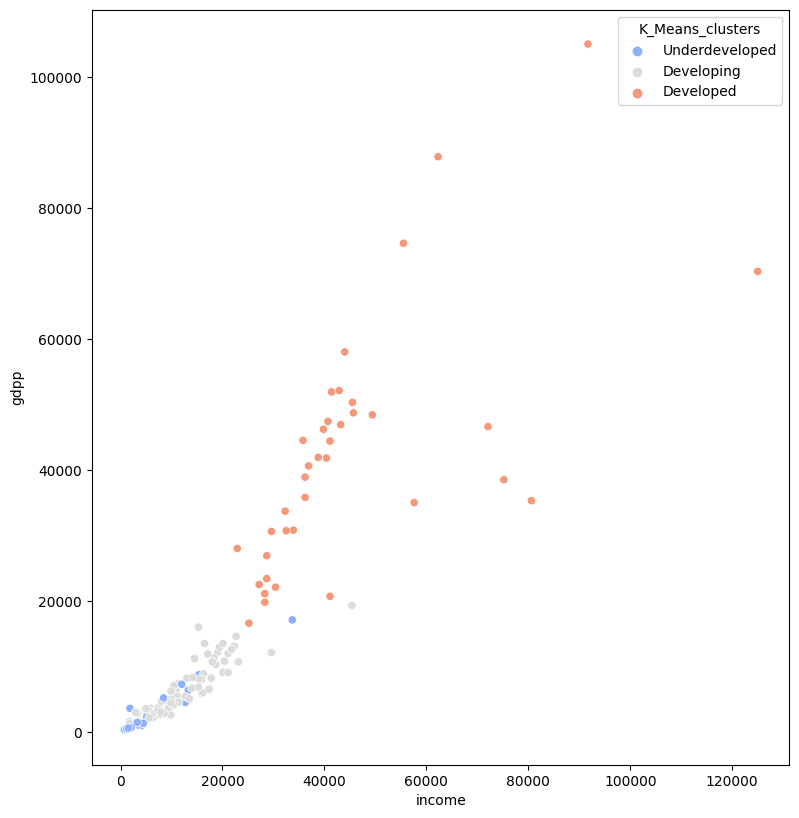

In [159]:
plt.figure(figsize=(9,10),dpi=100)
sns.scatterplot(data=df_final,x='income',y='gdpp',hue='K_Means_clusters',palette='coolwarm')
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

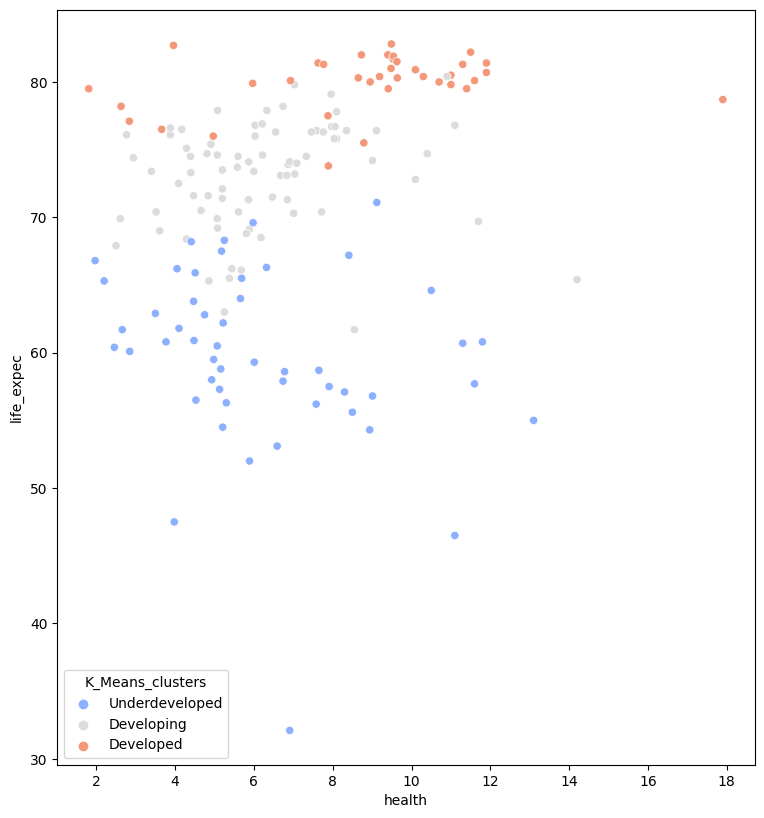

In [160]:
plt.figure(figsize=(9,10),dpi=100)
sns.scatterplot(data=df_final,x='health',y='life_expec',hue='K_Means_clusters',palette='coolwarm')
plt.grid

Clustering with Hierarchical

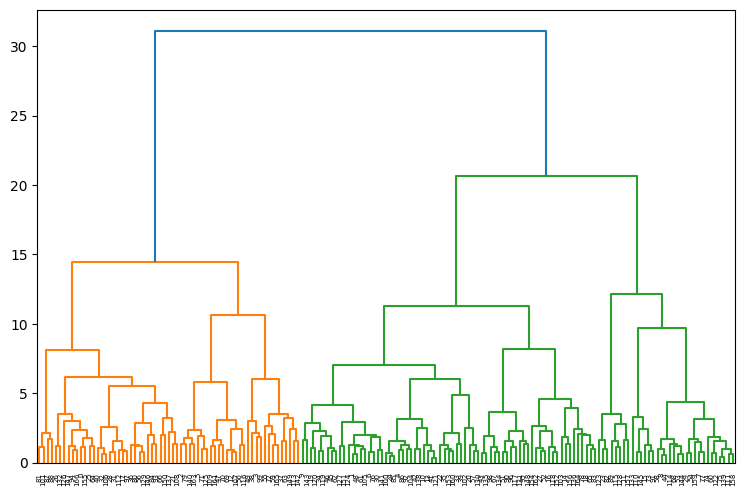

In [161]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(9,6),dpi=100)
dendrogram(linkage(df_pca,method='ward',metric='euclidean'))
plt.show()

In [162]:
from sklearn.cluster import AgglomerativeClustering
from pandas._libs import algos
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit_predict(df)


In [163]:
df_final["Hierarchical_clusters"]=hc


In [164]:
hc


array([0, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       1, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0])

In [165]:
df_final[df_final["Hierarchical_clusters"]==0].head(3)
#0--developed
#1--developing
#2--underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierarchical_clusters
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,0


In [166]:
df_final["Hierarchical_clusters"].replace({0:"Developed",
                                      1:"Developing",
                                      2:"Underdeveloped"},inplace=True)

In [167]:
df_final.Hierarchical_clusters.value_counts()

Underdeveloped    71
Developed         63
Developing        33
Name: Hierarchical_clusters, dtype: int64

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

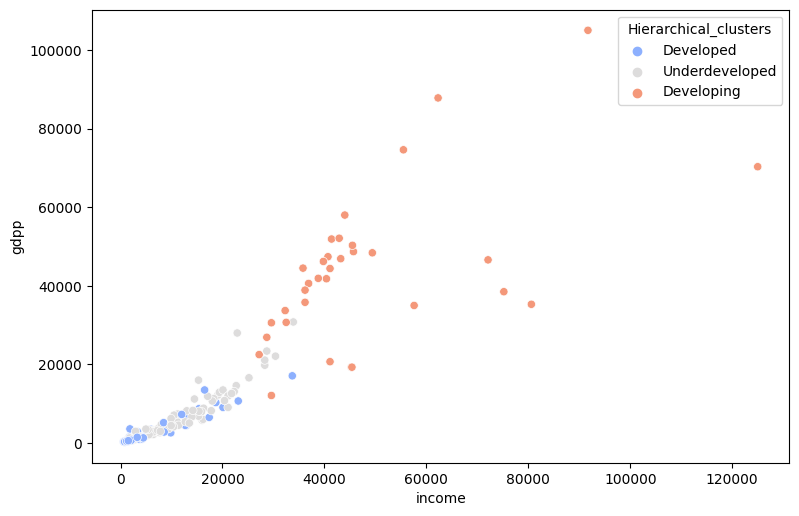

In [168]:
plt.figure(figsize=(9,6),dpi=100)
sns.scatterplot(data=df_final,x='income',y='gdpp',hue='Hierarchical_clusters',palette='coolwarm')
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

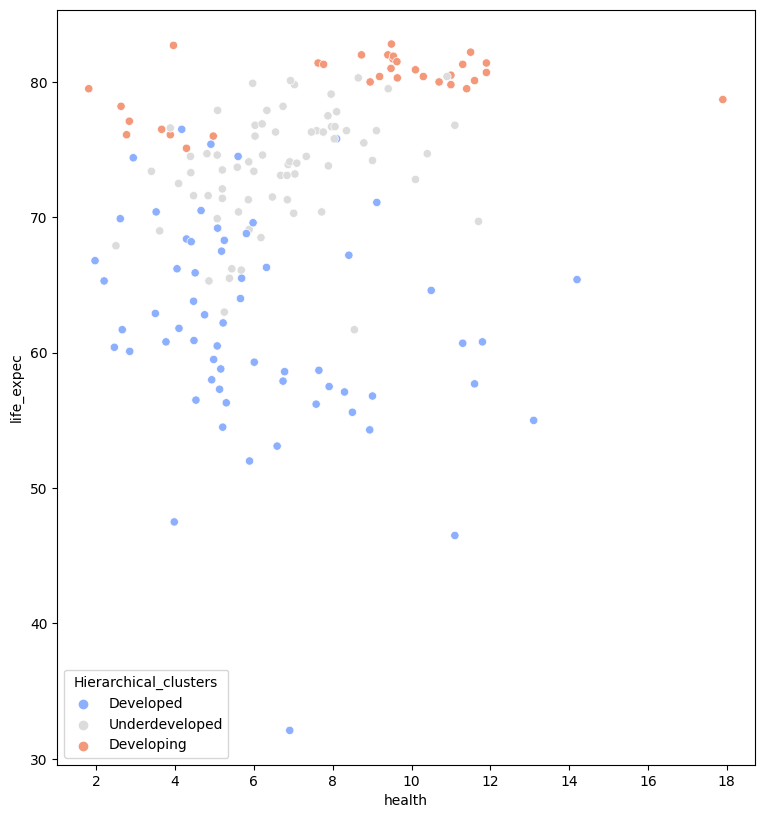

In [169]:
plt.figure(figsize=(9,10),dpi=100)
sns.scatterplot(data=df_final,x='health',y='life_expec',hue='Hierarchical_clusters',palette='coolwarm')
plt.grid